## Epochwise Training  Loss trend for validity models 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


model_results = {
    "XLM-RoBERTa-base": {
        "epochs":       [1, 2, 3, 4, 5],              
        "train_loss":   [0.67, 0.59, 0.49, 0.46, 0.37]
    },
    "mDeBERTa-v3-base": {
        "epochs":       [1, 2, 3, 4, 5],              
        "train_loss":   [0.65, 0.49, 0.41, 0.32, 0.24]
    },
    "distilXLM-RoBERTa-base": {
        "epochs":       [1, 2, 3, 4, 5],              
        "train_loss":   [0.66, 0.51, 0.37, 0.30, 0.25]
    },
    "RemBERT": {
        "epochs":       [1, 2, 3, 4, 5],              
        "train_loss":   [0.70, 0.69, 0.68, 0.68, 0.67]
    }
}


In [4]:
rows = []

for model_name, metrics in model_results.items():
    epochs = metrics["epochs"]
    losses = metrics["train_loss"]
    for e, l in zip(epochs, losses):
        rows.append({
            "model": model_name,
            "epoch": e,
            "train_loss": l,
        })

df = pd.DataFrame(rows)
df = df.sort_values(["model", "epoch"]).reset_index(drop=True)
df

,model,epoch,train_loss
0,RemBERT,1,0.70
1,RemBERT,2,0.69
2,RemBERT,3,0.68
3,RemBERT,4,0.68
4,RemBERT,5,0.67
5,XLM-RoBERTa-base,1,0.67
6,XLM-RoBERTa-base,2,0.59
7,XLM-RoBERTa-base,3,0.49
8,XLM-RoBERTa-base,4,0.46
9,XLM-RoBERTa-base,5,0.37


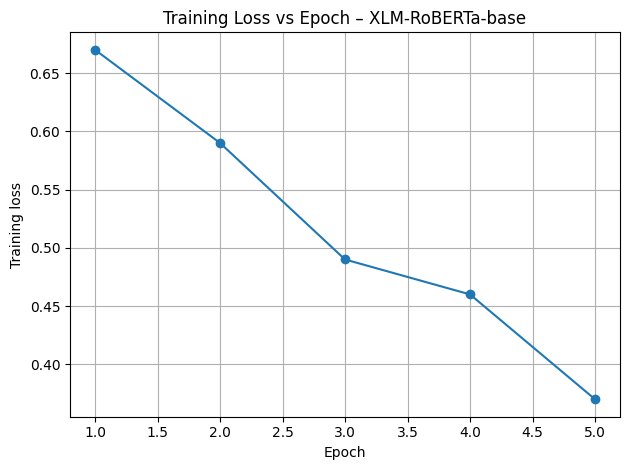

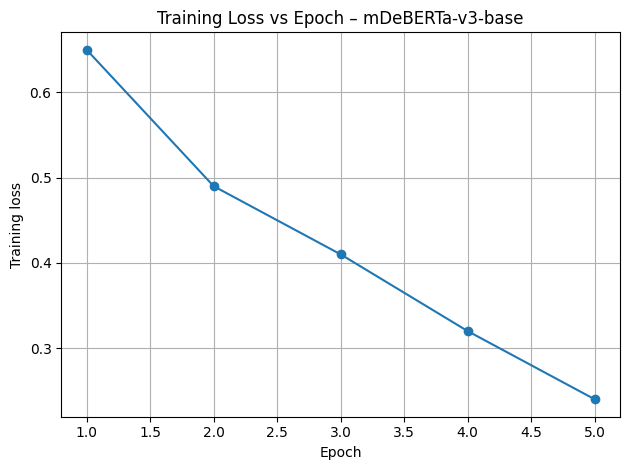

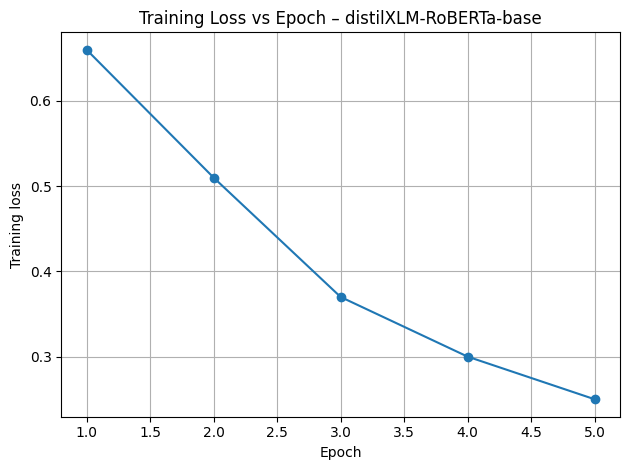

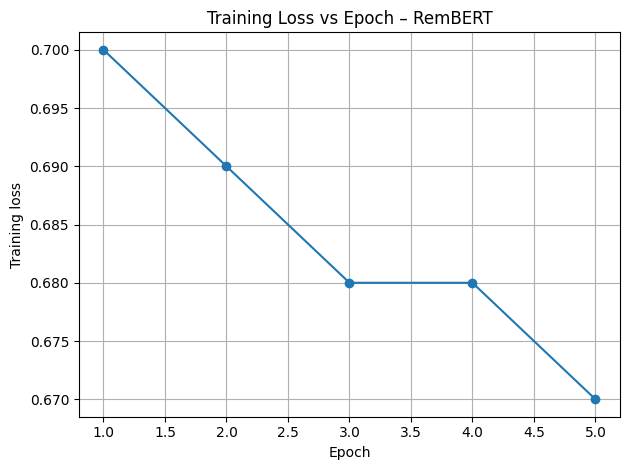

In [5]:
for model_name in model_results.keys():
    mdf = df[df["model"] == model_name]

    plt.figure()
    plt.plot(mdf["epoch"], mdf["train_loss"], marker="o")
    plt.title(f"Training Loss vs Epoch – {model_name}")
    plt.xlabel("Epoch")
    plt.ylabel("Training loss")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Across epochs, mDeBERTa-v3-base and distilXLM-RoBERTa-base show a clear and steady decrease in training loss, while RemBERT’s loss barely improves, indicating underfitting or an optimization issue compared to the other models.

## Step-wise Training Loss for Retrained mDeBERTa-v3 Validity Model

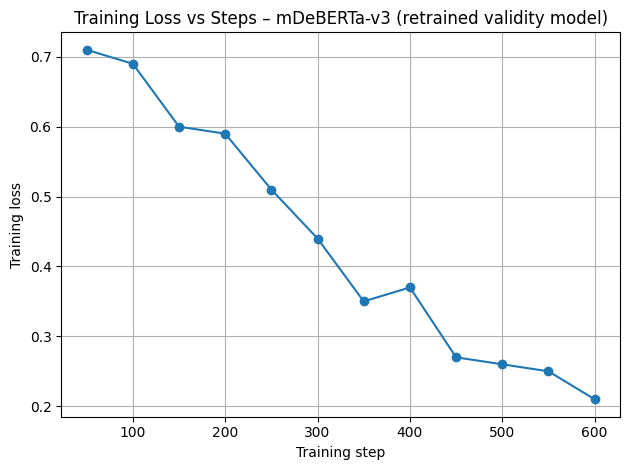

In [6]:
retrained_steps = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
retrained_train_loss = [ 0.71, 0.69, 0.60, 0.59, 0.51, 0.44, 0.35, 0.37, 0.27, 0.26, 0.25, 0.21]

plt.figure()
plt.plot(retrained_steps, retrained_train_loss, marker="o")
plt.title("Training Loss vs Steps – mDeBERTa-v3 (retrained validity model)")
plt.xlabel("Training step")
plt.ylabel("Training loss")
plt.grid(True)
plt.tight_layout()
plt.show()

The retrained mDeBERTa-v3 validity model shows a sharp and consistent drop in loss over training steps, suggesting the model continues to learn effectively even beyond the original 5-epoch setup.

In [8]:
import pandas as pd

validation_records = [
    {
        "model": "XLM-RoBERTa-base",
        "best_epoch": 5.0,
        "eval_accuracy": 0.72,
        "eval_f1": 0.73,
        "eval_loss": 0.76
    },
    {
        "model": "mDeBERTa-v3-base",
        "best_epoch": 5.0,
        "eval_accuracy": 0.83,
        "eval_f1": 0.85,
        "eval_loss": 0.48
    },
    {
        "model": "distilXLM-RoBERTa-base",
        "best_epoch": 5.0,
        "eval_accuracy": 0.79,
        "eval_f1": 0.79,
        "eval_loss": 0.54
    },
    {
        "model": "RemBERT",
        "best_epoch": 3.0, 
        "eval_accuracy": 0.63,
        "eval_f1": 0.61,
        "eval_loss": 0.68
    },
    {
        "model": "mDeBERTa-v3-base (retrained)",
        "best_epoch": 6.0,
        "eval_accuracy": 0.81,
        "eval_f1": 0.80,
        "eval_loss": 0.61     
    },
]

validation_df = pd.DataFrame(validation_records)
validation_df


,model,best_epoch,eval_accuracy,eval_f1,eval_loss
0,XLM-RoBERTa-base,5.0,0.72,0.73,0.76
1,mDeBERTa-v3-base,5.0,0.83,0.85,0.48
2,distilXLM-RoBERTa-base,5.0,0.79,0.79,0.54
3,RemBERT,3.0,0.63,0.61,0.68
4,mDeBERTa-v3-base (retrained),6.0,0.81,0.80,0.61


### Validation Accuracy across Models

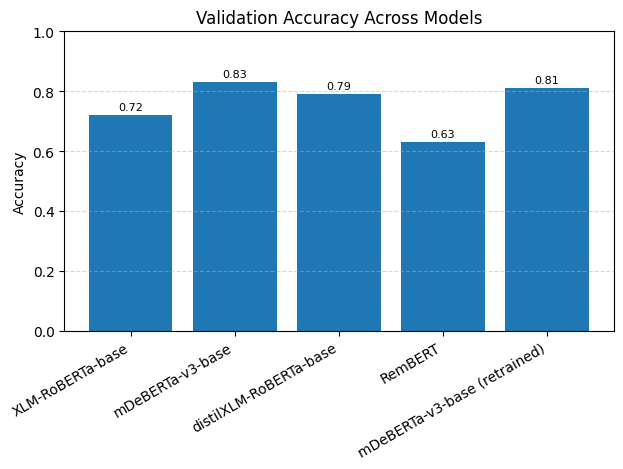

In [15]:
plt.figure()
bars = plt.bar(validation_df["model"], validation_df["eval_accuracy"])
plt.title("Validation Accuracy Across Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=30, ha="right")
plt.ylim(0, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.5)

for bar, acc in zip(bars, validation_df["eval_accuracy"]):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{acc:.2f}",              
        ha="center",
        va="bottom",
        fontsize=8,
    )

plt.tight_layout()
plt.show()


mDeBERTa-v3-base achieves the highest validation accuracy (~0.83), followed by the retrained mDeBERTa-v3 (~0.81) and distilXLM-RoBERTa (~0.79), while RemBERT clearly lags behind (~0.63), confirming it’s the weakest model for this task.

### Validation F1 Score Across Models

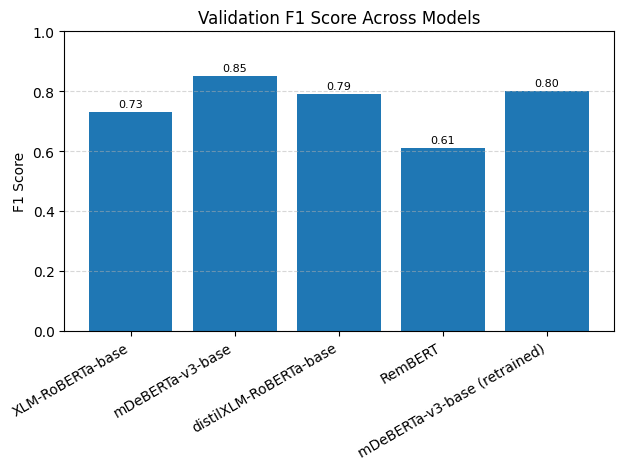

In [16]:
plt.figure()
bars = plt.bar(validation_df["model"], validation_df["eval_f1"])
plt.title("Validation F1 Score Across Models")
plt.ylabel("F1 Score")
plt.xticks(rotation=30, ha="right")
plt.ylim(0, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.5)

for bar, f1 in zip(bars, validation_df["eval_f1"]):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{f1:.2f}",
        ha="center",
        va="bottom",
        fontsize=8,
    )

plt.tight_layout()
plt.show()

The F1 scores mirror the accuracy trend, with mDeBERTa-v3-base leading (~0.85) and the retrained version (~0.80) and distilXLM-RoBERTa (~0.79) close behind, indicating that these models balance precision and recall better than XLM-R and RemBERT.

### Validation Loss Across Models

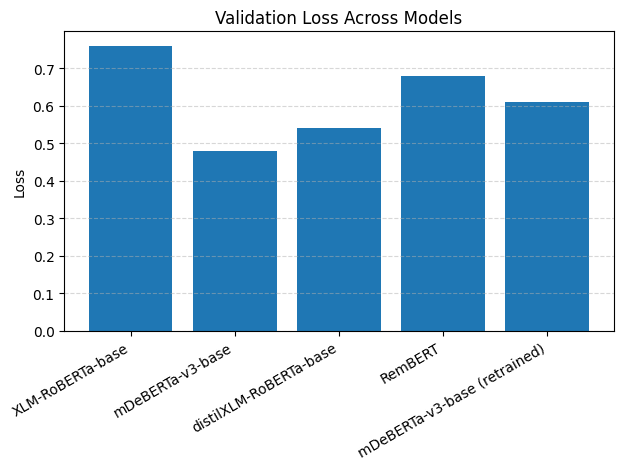

In [17]:
plt.figure()
plt.bar(validation_df["model"], validation_df["eval_loss"])
plt.title("Validation Loss Across Models")
plt.ylabel("Loss")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


mDeBERTa-v3-base has the lowest validation loss (~0.48), suggesting the best fit to the validation data, while XLM-RoBERTa and RemBERT exhibit higher losses, consistent with their weaker accuracy and F1 scores.

### Step wise training loss for Plausibility Classification Model

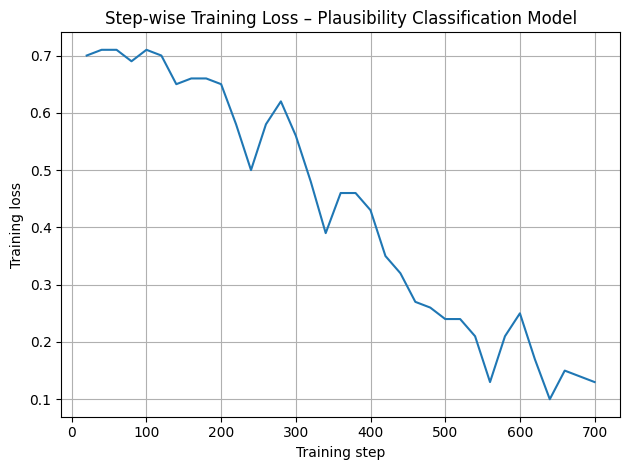

In [22]:
import matplotlib.pyplot as plt

steps = [
    20, 40, 60, 80, 100, 120, 140, 160, 180, 200,
    220, 240, 260, 280, 300, 320, 340, 360, 380, 400,
    420, 440, 460, 480, 500, 520, 540, 560, 580, 600,
    620, 640, 660, 680, 700
]

train_loss_raw = [
    0.700700, 0.714800, 0.707000, 0.693600, 0.707400,
    0.697500, 0.652200, 0.663200, 0.662100, 0.646200,
    0.579900, 0.496700, 0.575800, 0.623900, 0.561200,
    0.477300, 0.387300, 0.459700, 0.459100, 0.426300,
    0.350800, 0.316400, 0.272100, 0.261600, 0.235300,
    0.239300, 0.213600, 0.132700, 0.207000, 0.246900,
    0.165000, 0.100500, 0.147500, 0.139500, 0.132200
]

train_loss = [round(x, 2) for x in train_loss_raw]

plt.figure()
plt.plot(steps, train_loss)
plt.title("Step-wise Training Loss – Plausibility Classification Model")
plt.xlabel("Training step")
plt.ylabel("Training loss")
plt.grid(True)
plt.tight_layout()
plt.show()


The plausibility model’s training loss steadily declines over steps, with especially sharp drops in the later region, indicating stable optimization and strong convergence as training progresses.

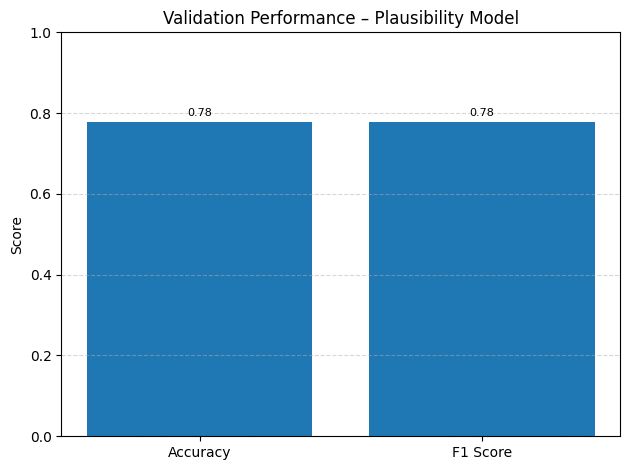

In [23]:
plaus_accuracy = 0.7778
plaus_f1 = 0.7776
plaus_loss = 0.8641

metrics = ["Accuracy", "F1 Score"]
values = [plaus_accuracy, plaus_f1]

plt.figure()
bars = plt.bar(metrics, values)
plt.title("Validation Performance – Plausibility Model")
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.5)

for bar, val in zip(bars, values):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,
        f"{val:.2f}",
        ha="center",
        va="bottom",
        fontsize=8,
    )

plt.tight_layout()
plt.show()

The plausibility model reaches an accuracy of about 0.78 and macro F1 around 0.78, showing that it performs consistently well across classes rather than overfitting to a single label.

### Prediction Model Performance – Validity Modle vs Plausibility Model

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

prediction_records = [
    {"task": "Validity",     "accuracy": 0.5875, "f1_macro": 0.5429},
    {"task": "Plausibility", "accuracy": 0.75,   "f1_macro": 0.7498},
]

pred_df = pd.DataFrame(prediction_records)
pred_df

,task,accuracy,f1_macro
0,Validity,0.5875,0.5429
1,Plausibility,0.7500,0.7498


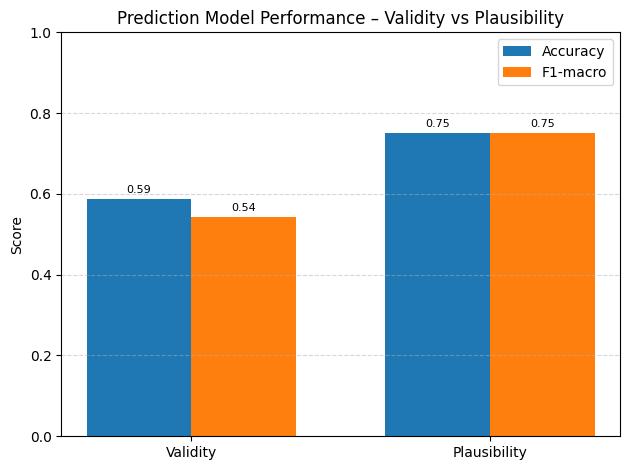

In [27]:
tasks = pred_df["task"]
x = range(len(tasks))
width = 0.35  

plt.figure()

plt.bar([i - width/2 for i in x], pred_df["accuracy"],  width=width, label="Accuracy")
plt.bar([i + width/2 for i in x], pred_df["f1_macro"], width=width, label="F1-macro")

plt.title("Prediction Model Performance – Validity vs Plausibility")
plt.ylabel("Score")
plt.xticks(list(x), tasks)
plt.ylim(0, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend()

for i, acc in zip([i - width/2 for i in x], pred_df["accuracy"]):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha="center", va="bottom", fontsize=8)

for i, f1 in zip([i + width/2 for i in x], pred_df["f1_macro"]):
    plt.text(i, f1 + 0.01, f"{f1:.2f}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()


For the prediction model, plausibility is clearly easier than validity (0.75 vs 0.59 accuracy and ~0.75 vs ~0.54 F1-macro), indicating that predicting plausibility labels is more reliable than predicting validity on the held-out test set.

### Prediction Model – Validity Task (Test Set) Per-class Metrics

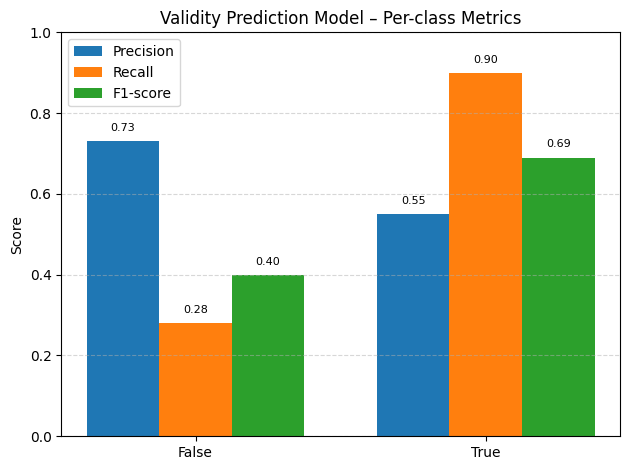

In [28]:
import numpy as np

classes = ["False", "True"]
precision = [0.73, 0.55]
recall    = [0.28, 0.90]
f1        = [0.40, 0.69]

x = np.arange(len(classes))
width = 0.25  

plt.figure()

plt.bar(x - width, precision, width=width, label="Precision")
plt.bar(x,         recall,    width=width, label="Recall")
plt.bar(x + width, f1,        width=width, label="F1-score")

plt.title("Validity Prediction Model – Per-class Metrics")
plt.xticks(x, classes)
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend()

for i, (p, r, f) in enumerate(zip(precision, recall, f1)):
    for offset, val in zip([-width, 0, width], [p, r, f]):
        plt.text(
            x[i] + offset,
            val + 0.02,
            f"{val:.2f}",
            ha="center",
            va="bottom",
            fontsize=8,
        )

plt.tight_layout()
plt.show()